In [7]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)


image = cv2.imread('paragraph.png')

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)


Text Detection in Grayscale Image: The Dangerous and Thrilling Documentation
Chronicles

This journey begins on a bleary Monday morning. Our intrepid team is in
desperate need of double shot mochas, but the milk expired eight days ago. A trip
to the dairy was out of the question. On Friday night, a mutant, script-injecting
warlock had infected the Shetland cattle herd with a ravenous craving for tags and
annotations. The security wolves were at a trust building retreat in Katchanga,
and no one in the village could locate their defensive operations manual.

Weak daylight trickled across the stripped pasture, chased by distant bovine screams.

Cavern Glow

The river rages through the cavern, rattiing its content

------------------------------------------
Text Detection in AdaptiveThreshold Image: The Dangerous and Thrilling Documentation
Chronicles

This journey begins on a bleary Monday morning. Our intrepid team is in
desperate need of double shot mochas, but the milk expired eight da

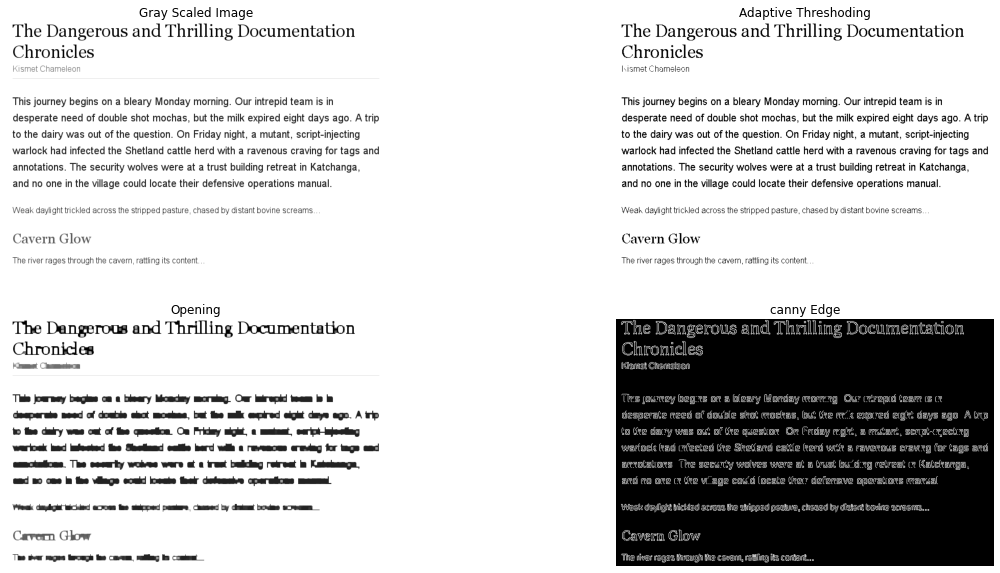

In [23]:
# create figure
fig = plt.figure(figsize=(20, 10))
  
# setting values to rows and column variables
rows = 2
columns = 2
  
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(gray,cmap="gray")
plt.axis('off')
plt.title("Gray Scaled Image")
txt = pytesseract.image_to_string(gray)
print('Text Detection in Grayscale Image:\n',txt)
print('------------------------------------------')
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(thresh,cmap="gray")
plt.axis('off')
plt.title("Adaptive Threshoding")
txt = pytesseract.image_to_string(thresh)
print('Text Detection in AdaptiveThreshold Image:\n',txt)
print('------------------------------------------')
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(opening,cmap="gray")
plt.axis('off')
plt.title("Opening")
txt = pytesseract.image_to_string(gray)
print('Text Detection in Opening Image:\n',txt)
print('------------------------------------------')
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(canny,cmap="gray")
plt.axis('off')
plt.title("canny Edge")
txt = pytesseract.image_to_string(gray)
print('Text Detection in Canny Edge Image:\n',txt)